## K Means Clustering

K Means is an unsupervised learning algo which groups similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.”

Clustering is the process of dividing the entire data into groups (also known as clusters) based on the patterns in the data.

## K Means Working

To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids

## 1. Import required libraries

In [54]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
import numpy as np
from scipy import sparse
from sklearn.metrics import accuracy_score

## 2. Check the shape of x and y

In [55]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


## Let us see the images

<Figure size 640x480 with 0 Axes>

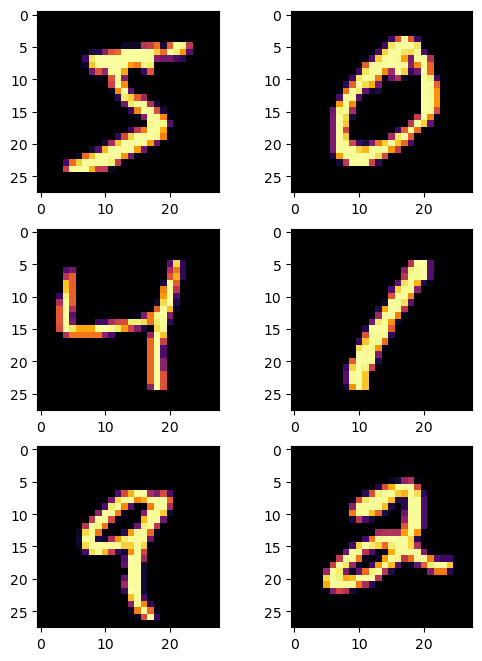

In [56]:
plt.inferno() # Making it more colorful
plt.figure(figsize = (6, 8)) # Adjusting figure size
# Displaying a grid of 3x2 images

for i in range(6):
 plt.subplot(3,2,i+1)
 plt.imshow(x_train[i]) #Display data as an image, i.e., on a 2D regular raster.

## 3. Pre processing the data

Data normalization is done by subtracting the mean from each pixel and then dividing the result by the standard deviation. The distribution of such data would resemble a Gaussian curve centered at zero. For image inputs we need the pixel numbers to be positive. So the image input is divided by 255 so that input values are in range of [0,1].

In [57]:
print(x_train.min())
print(x_train.max())

0
255


In [58]:
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

## Check again

In [59]:
print(x_train.min())
print(x_train.max())

0.0
1.0


### The input data has to be converted from 3d format to 2d format to be fed into the algorithm. Hence the input data has to be reshaped.

In [60]:
X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)

In [61]:
print(X_train.shape)
print(X_test.shape)
X_train

(60000, 784)
(10000, 784)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

As we can clearly see above, we only have 2 dimensions and the size is the same as 28 * 28 = 784

## 4. Building model with mini-batch K-Means

In [62]:
total_clusters = len(np.unique(y_test))
# Initialize the K-Means model 

kmeans = MiniBatchKMeans(n_clusters = total_clusters)

X_train_sparse = sparse.csr_matrix(X_train)
kmeans.fit(X_train_sparse)


MiniBatchKMeans(n_clusters=10)

In [63]:
print(kmeans.labels_)

kmeans.labels_.size

[0 5 3 ... 0 6 8]


60000

kmeans.labels_ is an array of length 60000 as there are 60000 images in the training set.

But the kmeans.labels_ only denotes the cluster to which the image belongs to. It doesn’t denote the number displayed in image. Hence we write a separate function to retrieve the necessary information from kmeans.labels_

In [64]:
def retrieve_info(cluster_labels,y_train):

# Initializing
    reference_labels = {}
# For loop to run through each label of cluster label
    for i in range(len(np.unique(kmeans.labels_))):
        index = np.where(cluster_labels == i,1,0)
        num = np.bincount(y_train[index==1]).argmax()
        reference_labels[i] = num
    return reference_labels
print(reference_labels)

{0: 8, 1: 4, 2: 1, 3: 6, 4: 0, 5: 4, 6: 7, 7: 5, 8: 3, 9: 1}


What does this mean? - A cluster label of 0 is a cluster of images of 8, that of 1 is 4, that of 2 is 1 etc

In [65]:
reference_labels = retrieve_info(kmeans.labels_,y_train)

number_labels = np.random.rand(len(kmeans.labels_))

for i in range(len(kmeans.labels_)):
  number_labels[i] = reference_labels[kmeans.labels_[i]]

In [66]:
print(number_labels[:20].astype('int'))
print(y_train[:20])

[8 0 4 1 4 2 1 8 1 7 8 1 3 6 1 7 2 7 6 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [67]:
print(accuracy_score(number_labels,y_train))

0.5732833333333334


This gives us about 57% accuracy only.

## 5. Optimization of Algorithm

1. Inertia is a measure of how internally coherent clusters are. It is inversely proportional to sum of squares of distances between data points and their respective cluster’s centroid. Higher the number of clusters, lower is the inertia score.

2. Homogeneity is a measure of data points of a particular cluster belonging to a single class.